In [1]:
# Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pyreadr
import seaborn as sns

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

from matplotlib import colors as mcolors
COLORS = [v for v in mcolors.BASE_COLORS.values()]

readRDS = robjects.r['readRDS']

PATH_RESULTS = './results/'

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

COLORS = ["#377eb8", "#ff7f00", "#4daf4a",
          "#f781bf", "#a65628", "#984ea3",
          "#999999", "#e41a1c", "#dede00"]
custom_palette = sns.set_palette(sns.color_palette(COLORS))

In [2]:
# Load results
with open('./results/results_fcubt.pkl', 'rb') as f:
    results_fcubt = pickle.load(f)
with open('./results/results_FPCA_GMM.pkl', 'rb') as f:
    results_FPCA_GMM = pickle.load(f)
with open('./results/results_fcubt_grow.pkl', 'rb') as f:
    results_grow = pickle.load(f)
with open('./results/results_kmeans.pkl', 'rb') as f:
    results_kmeans = pickle.load(f)
with open('./results/results_kmeans_derivative.pkl', 'rb') as f:
    results_kmeans_derivative = pickle.load(f)

results_funhddc = readRDS('./results/results_funhddc.rds')
results_funhddc = pandas2ri.rpy2py_dataframe(results_funhddc)
results_funclust = readRDS('./results/results_funclust.rds')
results_funclust = pandas2ri.rpy2py_dataframe(results_funclust)

In [3]:
# FCUBT
n_clusters_fcubt = np.array([simu['n_clusters'] for idx, simu in enumerate(results_fcubt)])
ARI_fcubt = np.array([simu['ARI'] for idx, simu in enumerate(results_fcubt)])

In [4]:
# FPCA+GMM
n_clusters_FPCA_GMM = np.array([max(simu, key=lambda key: simu[key]) for idx, simu in enumerate(results_FPCA_GMM)])
ARI_FPCA_GMM = np.array([max(simu.values()) for idx, simu in enumerate(results_FPCA_GMM)])

In [5]:
# GROW
n_clusters_grow = np.array([simu['n_clusters'] for idx, simu in enumerate(results_grow)])
ARI_grow = np.array([simu['ARI'] for idx, simu in enumerate(results_grow)])

In [6]:
# KMEANS
n_clusters_kmeans = np.array([max(simu, key=lambda key: simu[key]) for idx, simu in enumerate(results_kmeans)])
ARI_kmeans = np.array([max(simu.values()) for idx, simu in enumerate(results_kmeans)])

In [7]:
# KMEANS DERIVATIVE
n_clusters_kmeans_deriv = np.array([max(simu, key=lambda key: simu[key]) for idx, simu in enumerate(results_kmeans_derivative)])
ARI_kmeans_deriv = np.array([max(simu.values()) for idx, simu in enumerate(results_kmeans_derivative)])

In [8]:
# FUNHDDC
n_clusters_funhddc = np.array(results_funhddc['n_cluster'])
ARI_funhddc = np.array(results_funhddc['ARI'])

In [9]:
# FUNCLUST
n_clusters_funclust = np.array(results_funclust['n_cluster'])
ARI_funclsut = np.array(results_funclust['ARI'])

In [10]:
n_clusters = pd.DataFrame({'\texttt{fCUBT}': n_clusters_fcubt,
                           '\texttt{Growing}': n_clusters_grow,
                           '\texttt{FPCA+GMM}': n_clusters_FPCA_GMM,
                           '\texttt{FunHDDC}': n_clusters_funhddc,
                           '\texttt{Funclust}': n_clusters_funclust,
                           '$k$\texttt{-means-}$d_1$': n_clusters_kmeans,
                           '$k$\texttt{-means-}$d_2$': n_clusters_kmeans_deriv
                          })

In [11]:
n_clusters.apply(pd.value_counts, normalize=True).T

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,15.0
\texttt{fCUBT},NaN,NaN,NaN,NaN,0.664,0.238,0.074,0.022,0.002,NaN,NaN,NaN,NaN,NaN
\texttt{Growing},NaN,NaN,NaN,NaN,0.604,0.182,0.082,0.062,0.026,0.014,0.016,0.006,0.006,0.002
\texttt{FPCA+GMM},NaN,NaN,NaN,NaN,0.414,0.396,0.164,0.026,NaN,NaN,NaN,NaN,NaN,NaN
\texttt{FunHDDC},0.508,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\texttt{Funclust},NaN,0.066,0.182,0.192,0.200,0.196,0.136,0.028,NaN,NaN,NaN,NaN,NaN,NaN
$k$\texttt{-means-}$d_1$,NaN,NaN,NaN,NaN,0.034,0.144,0.206,0.616,NaN,NaN,NaN,NaN,NaN,NaN
$k$\texttt{-means-}$d_2$,NaN,0.004,0.010,0.094,0.874,0.010,0.002,0.006,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ARI = pd.DataFrame({'\\texttt{fCUBT}': ARI_fcubt,
                    '\\texttt{Growing}': ARI_grow,
                    '\\texttt{FPCA+GMM}': ARI_FPCA_GMM,
                    '\\texttt{FunHDDC}': ARI_funhddc,
                    '\\texttt{Funclust}': ARI_funclsut,
                    '$k$\\texttt{-means-}$d_1$': ARI_kmeans,
                    '$k$\\texttt{-means-}$d_2$': ARI_kmeans_deriv
                   })

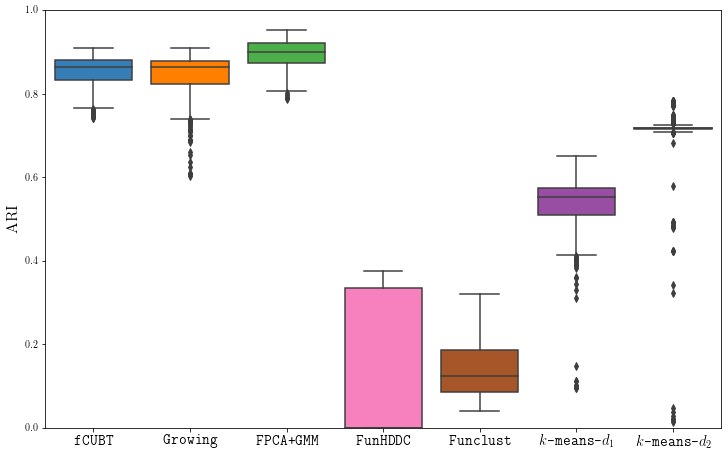

In [13]:
plt.figure(figsize=(10, 6.21), constrained_layout=True)
bplot = sns.boxplot(data=ARI)
bplot.set_xticklabels(bplot.get_xticklabels(), size=15)
for i in range(7):
    mybox = bplot.artists[i]
    mybox.set_facecolor(COLORS[i])
plt.ylabel('ARI', size=16)
plt.ylim((0, 1))
plt.savefig('./figures/ARI_scenario_3.pdf')

## Comparison with classification

In [14]:
with open('./results/results_fcubt_classif.pkl', 'rb') as f:
    results_classif = pickle.load(f)

In [15]:
res = []
for simulation in results_classif:
    if simulation['n_clusters'] == 5:
        res.append(simulation)

In [16]:
print(f'Number of selected dataset {len(res)}.')

Number of selected dataset 188.


In [17]:
res = pd.DataFrame(res)
res.rename(columns = {'ARI_fcubt': '\\texttt{fCUBT}',
                      'ARI_gp':'\\texttt{GPC}',
                      'ARI_rf': '\\texttt{Random Forest}'}, inplace = True)
res = res.drop(['n_clusters'], axis=1)
res = res.reindex(columns=['\\texttt{fCUBT}', '\\texttt{GPC}', '\\texttt{Random Forest}'])

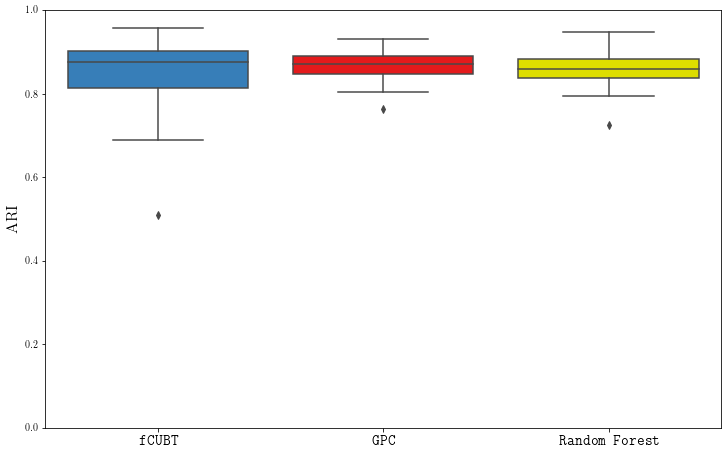

In [18]:
plt.figure(figsize=(10, 6.21), constrained_layout=True)
bplot = sns.boxplot(data=res)
bplot.set_xticklabels(bplot.get_xticklabels(), size=15)

mybox = bplot.artists[0]
mybox.set_facecolor(COLORS[0])
mybox = bplot.artists[1]
mybox.set_facecolor(COLORS[-2])
mybox = bplot.artists[2]
mybox.set_facecolor(COLORS[-1])

plt.ylabel('ARI', size=16)
plt.ylim((0, 1))
plt.savefig('./figures/comparison_scenario_3.pdf')

## Prediction

In [19]:
with open('./results/results_fcubt_prediction.pkl', 'rb') as f:
    results_pred = pickle.load(f)

In [20]:
results_pred_array = np.empty((500, 999))
for idx in range(len(results_pred)):
    results_pred_array[idx, :] = results_pred[idx]

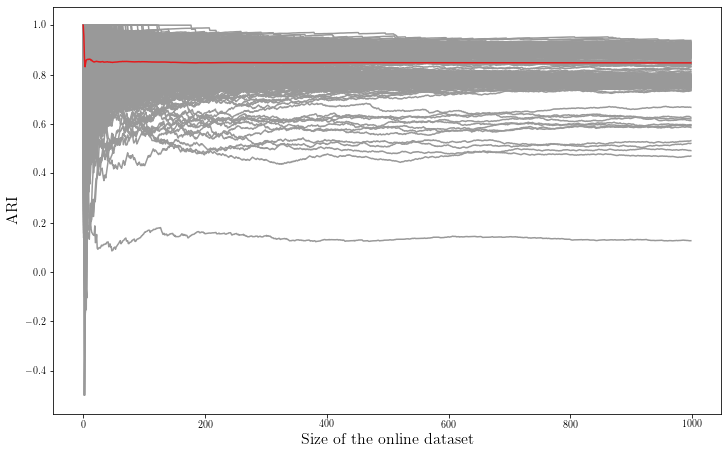

In [21]:
plt.figure(figsize=(10, 6.21), constrained_layout=True)
for idx in range(len(results_pred)):
    plt.plot(results_pred_array[idx, :], c=COLORS[6])
plt.plot(results_pred_array.mean(axis=0), c=COLORS[-2])

plt.ylabel('ARI', size=16)
plt.xlabel('Size of the online dataset', size=16)
plt.savefig('./figures/prediction_scenario_3.pdf')